<a href="https://colab.research.google.com/github/Amansh12123434/Amansh12123434/blob/main/videoprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall


0: 384x640 12 persons, 1 backpack, 2 handbags, 224.0ms
Speed: 2.9ms preprocess, 224.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


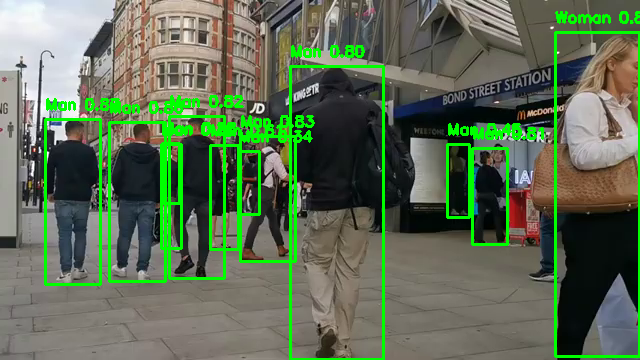


0: 384x640 12 persons, 1 backpack, 2 handbags, 185.4ms
Speed: 4.2ms preprocess, 185.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


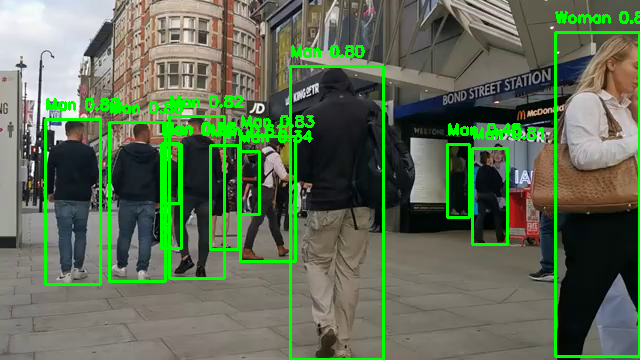


0: 384x640 12 persons, 1 backpack, 2 handbags, 213.7ms
Speed: 5.0ms preprocess, 213.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


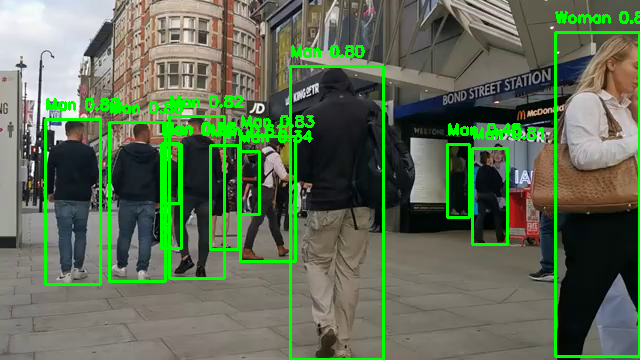


0: 384x640 12 persons, 1 backpack, 1 handbag, 289.6ms
Speed: 3.0ms preprocess, 289.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


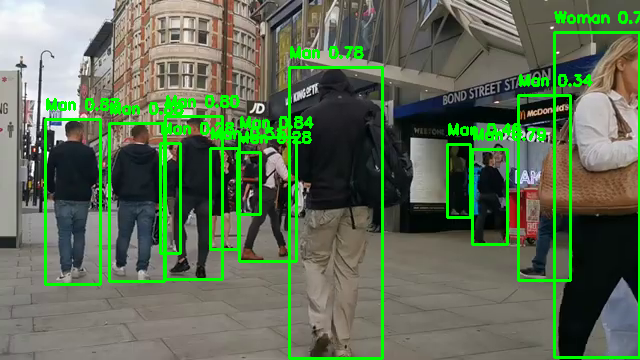


0: 384x640 11 persons, 1 backpack, 2 handbags, 200.7ms
Speed: 2.8ms preprocess, 200.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


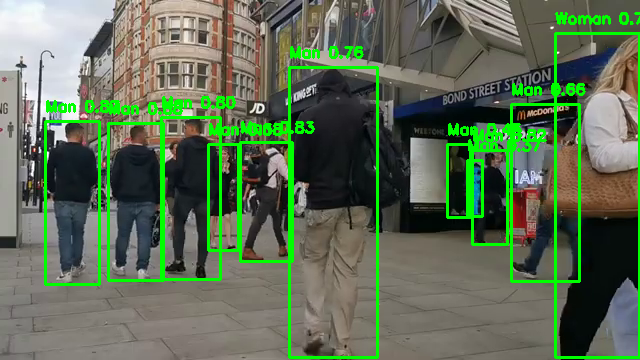


0: 384x640 11 persons, 1 backpack, 1 handbag, 201.0ms
Speed: 2.9ms preprocess, 201.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


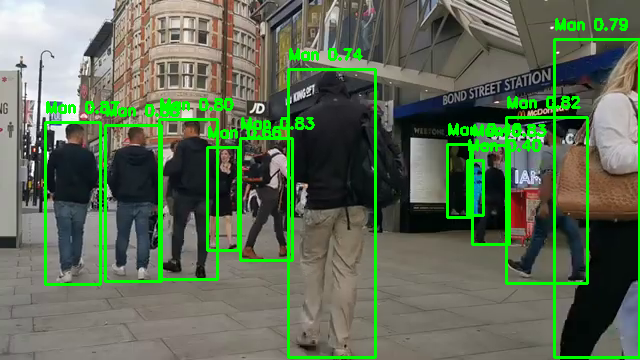


0: 384x640 11 persons, 1 backpack, 217.9ms
Speed: 2.6ms preprocess, 217.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


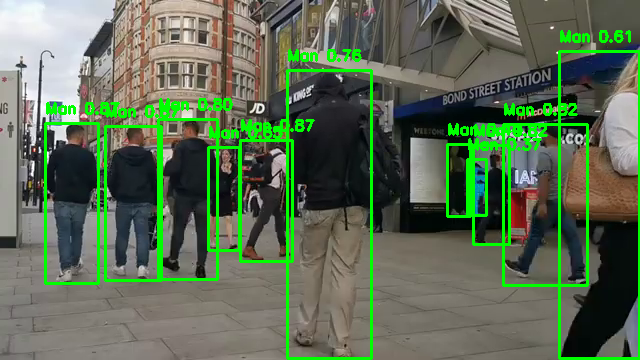


0: 384x640 11 persons, 1 backpack, 1 handbag, 232.8ms
Speed: 3.3ms preprocess, 232.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


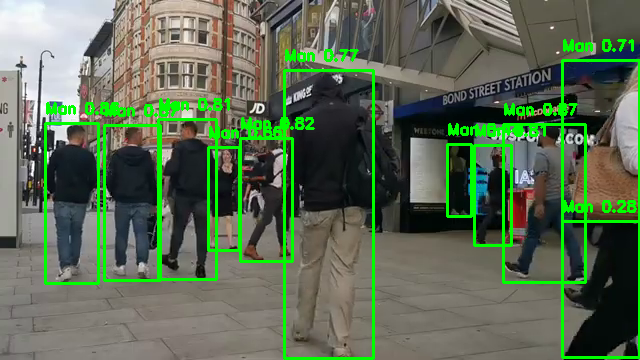


0: 384x640 12 persons, 1 backpack, 1 handbag, 242.9ms
Speed: 3.2ms preprocess, 242.9ms inference, 7.8ms postprocess per image at shape (1, 3, 384, 640)


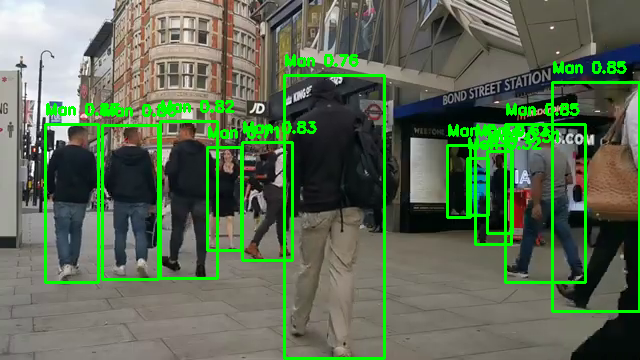


0: 384x640 12 persons, 1 backpack, 1 handbag, 229.7ms
Speed: 3.5ms preprocess, 229.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


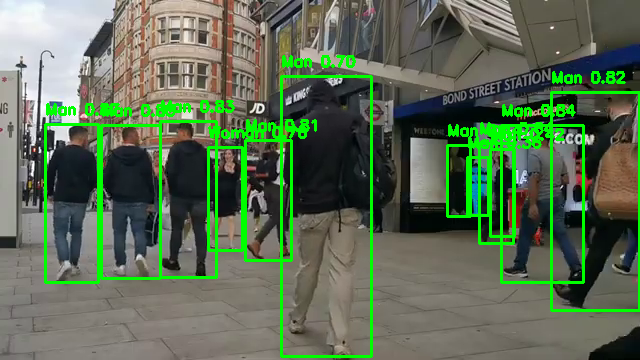


0: 384x640 13 persons, 1 backpack, 239.6ms
Speed: 3.3ms preprocess, 239.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


In [ ]:
import cv2
from transformers import AutoImageProcessor, AutoModelForImageClassification
import torch
from ultralytics import YOLO
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images in Colab

man = 0
woman = 0

# Load YOLO model and Hugging Face gender classifier
yolo_model = YOLO("yolo11n.pt")  # Ensure you have the correct YOLO model
processor = AutoImageProcessor.from_pretrained("rizvandwiki/gender-classification")
model = AutoModelForImageClassification.from_pretrained("rizvandwiki/gender-classification")

# Initialize video capture for the "dd.mp4" video file
cap = cv2.VideoCapture("dd.mp4")  # Provide the video file path

if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

while True:
    ret, frame = cap.read()  # Read a frame from the video capture
    if not ret:
        break  # Exit if no frame is returned (e.g., end of video)

    # Run YOLO inference on the frame
    results = yolo_model(frame)

    # List to store cropped person regions
    person_rois = []

    # Iterate through the detection results
    for result in results:
        boxes = result.boxes  # Get detected boxes
        for box in boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
            confidence = float(box.conf[0])  # Confidence score
            cls = int(box.cls[0])  # Class ID
            label = yolo_model.names[cls]  # Get class name

            if label == "person":  # Process only the "person" class
                # Crop the detected person region and append to list
                person_roi = frame[y1:y2, x1:x2]
                person_rois.append(person_roi)

    # Batch process the person regions for gender classification
    if person_rois:
        inputs = processor(person_rois, return_tensors="pt")  # Preprocess all images in a batch

        # Predict gender using the Hugging Face model in batch
        with torch.no_grad():
            logits = model(**inputs).logits  # Get raw model outputs for the entire batch
            predicted_class_idxs = torch.argmax(logits, dim=-1).cpu().numpy()  # Get predicted class indices for each image

        # Count the occurrences of "Man" and "Woman"
        for idx in predicted_class_idxs:
            if idx == 0:
                man += 1
            else:
                woman += 1

        # Draw bounding boxes and gender labels on the original frame
        person_idx = 0  # Index for tracking person region
        for result in results:
            boxes = result.boxes  # Get detected boxes
            for box in boxes:
                x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
                confidence = float(box.conf[0])  # Confidence score
                cls = int(box.cls[0])  # Class ID
                label = yolo_model.names[cls]  # Get class name

                if label == "person":  # Process only the "person" class
                    gender_label = "Man" if predicted_class_idxs[person_idx] == 1 else "Woman"

                    # Draw bounding box and gender label on the frame
                    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                    cv2.putText(frame, f"{gender_label} {confidence:.2f}", (x1, y1 - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

                    person_idx += 1

    # Display the annotated frame using cv2_imshow
    cv2_imshow(frame)  # Use cv2_imshow instead of cv2.imshow

    # Exit the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close any open windows
cap.release()
cv2.destroyAllWindows()

# Print the counts of each gender after processing the video
print("Man Count:", man)
print("Woman Count:", woman)
